In [42]:
import re
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np

In [45]:
amx_impact = 0
all_impact = 0
impact_pct = 0
cpu_freq = 0
cpu_power = 0
i = 0
d = OrderedDict()

with open('power.txt', 'r+') as f:
	for line in f:
		if re.search(r"amx_power +\d+.*", line):
			amx_impact = float(re.findall(r'\d+\.\d+', line)[-1])
		if re.search(r"ALL_TASKS +.*\d+.*", line):
			all_impact = float(re.findall(r'\d+\.\d+', line)[-1])
		if re.search(r"P0-Cluster HW active frequency: \d+ MHz", line):
			cpu_freq = float(re.findall(r'\d+', line)[-1]) / 1000
		if re.search(r"CPU Power: \d+ mW", line):
			cpu_power = float(re.findall(r'\d+', line)[-1]) / 1000
		if all_impact and cpu_freq and cpu_power:
			impact_pct = amx_impact / all_impact
			i += 1
			d[i*100] = {"impact": impact_pct, 
	       				"freq": cpu_freq, 
						"power": cpu_power}
			amx_impact = 0
			all_impact = 0
			cpu_freq = 0
			cpu_power = 0

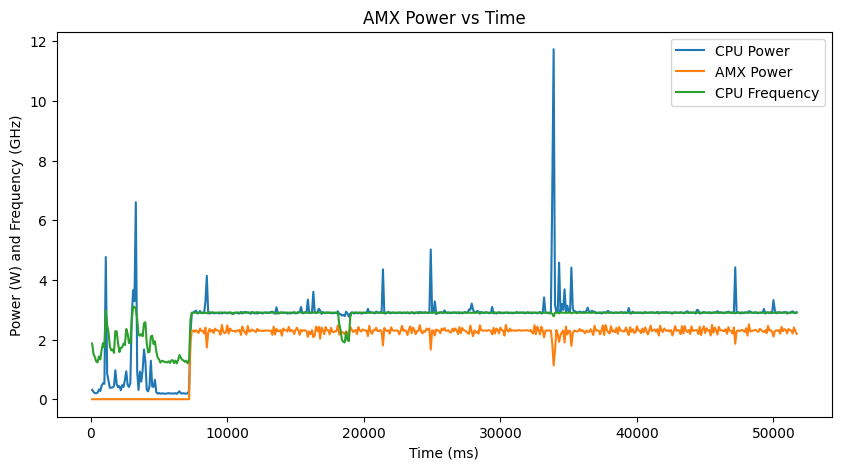

In [46]:
plt.figure(figsize=(10, 5))
x = list(d.keys())
total_power = np.array([val['power'] for val in d.values()])
freq = np.array([val['freq'] for val in d.values()])
amx_power = total_power * np.array([val['impact'] for val in d.values()])
plt.plot(x, total_power, label='CPU Power')
plt.plot(x, amx_power, label='AMX Power')
plt.plot(x, freq, label='CPU Frequency')
plt.xlabel('Time (ms)')
plt.ylabel('Power (W) and Frequency (GHz)')
plt.title('AMX Power vs Time')
plt.legend()